<a href="https://colab.research.google.com/github/hoshi036/pandas_tutorial/blob/master/bpAnalysis_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[データ分析で頻出のPandas基本操作（2019−03−05更新）](https://qiita.com/ysdyt/items/9ccca82fc5b504e7913a)よりコピー

# データ分析で頻出のPandas基本操作

機械学習や深層学習が人気の昨今ですが、それらのモデルの精度に最もクリティカルに影響するのはインプットする**データの質**です。データの質は、データを適切に把握し、不要なデータを取り除いたり、必要なデータを精査する**前処理**を行うことで担保することが出来ます。 

本頁では、データ処理の基本ツールとしてPandasの使い方を紹介します。Pandasには便利な機能がたくさんありますが、特に分析業務で**頻出の**Pandas関数・メソッドを重点的に取り上げました。

また、単に機能を説明するだけでは実際の処理動作がわかりにくいため、ここではSIGNATE(旧DeepAnalytics)の[お弁当の需要予想を行うコンペのデータ](https://signate.jp/competitions/24)を拝借し、このデータに対して一貫してPandasの処理を適応していくことで、一連のPandas操作（前処理のプロセス）を体験してもらいます。

![pandas](./figs/pandas.jpg)

## Pandasについて
- 公式ドキュメント：http://pandas.pydata.org/pandas-docs/stable/
- pandasは、Pythonにおいて、データ解析を支援する機能を提供するライブラリである。特に、数表および時系列データを操作するためのデータ構造と演算を提供する。
- pandasの特長
    - データ操作のための高速で効率的なデータフレーム (DataFrame) オブジェクト
    - メモリ内のデータ構造とその他のフォーマットのデータ間で相互に読み書きするためのツール群。フォーマット例: CSV、テキストファイル、Excel、SQLデータベース、HDF5フォーマットなど
    - かしこいデータのアライメントおよび統合された欠損値処理
    - データセットの柔軟な変形およびピボット
    - ラベルに基づいたスライス、fancyインデクシング、巨大なデータセットのサブセット取得
    - データセットに対するsplit-apply-combine操作を可能にするエンジンが提供するpowerful groupを使ったデータの集計および変換
    - 高性能なデータセットのマージと結合
    - 時系列データ: 日付範囲生成、周波数変換、移動窓を用いた統計値や線形回帰、シフトと遅延、など
    - パフォーマンスのための高度な最適化。重要なコードはCythonまたはC言語で実装されている。

## 本頁で紹介するPandasメソッド一覧

**① Pythonのバージョン確認、モジュールのimport、データの読み込み**
- pd.read_csv()
- df.head()
- df.tail()

**② 簡単にデータの状態を確認する（行数列数カウント・データの選択的表示・重複の有無など）**
- df.shape()
- df.index
- df.columns
- df.dtypes
- df.loc[]
- df.iloc[]
- df.query()
- df.unique()
- df.drop_duplicates()
- df.describe()

**③ データの整形（データ型変更、列名変更、並び替えなど）**
- df.set_index()
- df.rename()
- df.sort_values()
- df.to_datetime()
- df.sort_index()
- df.resample()
- df.apply()
- pd.cut()

**④ データの欠損状態の確認** 
- df.isnull()
- df.any()

**⑤ 値（欠損）の置き換えや削除**
- df.fillna()
- df.dropna()
- df.replace()
- df.mask()
- df.drop()

**⑥ 集計**
- df.value_counts()
- df.groupby()
- df.diff()
- df.rolling()
- df.pct_change()

**⑦ 可視化**
- df.plot()
- df.corr()
- df.pivot()

**⑧ 変数の前処理**
- pd.get_dummies()

**⑨ 最後に、出来たデータをもう一度眺める**
- df.to_csv()

## ① Pythonのバージョン確認、モジュールのimport、データの読み込み

まずはpandasと今回使うデータのimportを行い表示してみます。

In [0]:
# pythonのバージョン確認
!python -V

pyenv: version `conda201907' is not installed (set by /Users/osamu/Google ドライブ/趣味と仕事がクロス/プログラミング/statistics/.python-version)


In [0]:
# 一般的にpandasはpdと名前を付けてimportされる
import pandas as pd
import numexpr

In [0]:
# read_csvメソッドでお弁当需要予想に関するデータをcsvファイルとして読み込む
df = pd.read_csv('../files/bp-stats-review-2019-consolidated-dataset-narrow-format.csv', sep=',')

In [0]:
# データの確認をする（最初の3行を表示）
df.head(3)

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,Var,Value
0,Algeria,1965,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,wind_twh,0.0
1,Algeria,1966,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,wind_twh,0.0
2,Algeria,1967,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,wind_twh,0.0


### 各列の説明
データ詳細ページ: https://signate.jp/competitions/24/data

|No.|列名|内容|説明|
|:---|:---|:---|:---|
|1|datetime|日付|インデックスとして使用|
|2|y|販売数|目的変数|
|3|week|曜日|月～金|
|4|soldout|完売フラグ|0:完売せず、1:完売|
|5|name|メインメニュー|マルチバイト文字列（日本語）|
|6|kcal|カロリー（kcal）|整数。存在しないレコードあり|
|7|remarks|特記事項|自由記述|
|8|event|13時開始お弁当持ち込み可イベント|社内イベントの有無。存在しないレコードあり|
|9|payday|給料日フラグ|1:給料日|
|10|weather|天気|マルチバイト文字列（日本語）|
|11|precipitation|降水量|実数。降水量 0 は "--" と表記|
|12|temperature|気温|実数|

![dataframe](./figs/dataframe.png)

In [0]:
# 先頭の5行を表示
df.head()

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,Var,Value
0,Algeria,1965,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,wind_twh,0.0
1,Algeria,1966,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,wind_twh,0.0
2,Algeria,1967,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,wind_twh,0.0
3,Algeria,1968,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,wind_twh,0.0
4,Algeria,1969,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,wind_twh,0.0


In [0]:
# 最後尾の5行を表示
df.tail()

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,Var,Value
333095,Zimbabwe,2014,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,pop,15.411675
333096,Zimbabwe,2015,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,pop,15.777451
333097,Zimbabwe,2016,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,pop,16.150362
333098,Zimbabwe,2017,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,pop,16.529904
333099,Zimbabwe,2018,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,pop,16.913261


## ② 簡単にデータの状態を確認する（行数列数カウント・データの選択的表示・重複の有無など）
読み込んだデータがどんなものなのか、簡単に概要を掴むための操作を行います。

In [0]:
print('dataframeの行数・列数の確認==>\n' + str(df.shape))
print('indexの確認==>\n' + str(df.index))
print('columnの確認==>\n' + str(df.columns))
print('dataframeの各列のデータ型を確認==>\n' + str(df.dtypes))

dataframeの行数・列数の確認==>
(333100, 11)
indexの確認==>
RangeIndex(start=0, stop=333100, step=1)
columnの確認==>
Index(['Country', 'Year', 'ISO3166_alpha3', 'ISO3166_numeric', 'Region',
       'SubRegion', 'OPEC', 'EU', 'OECD', 'Var', 'Value'],
      dtype='object')
dataframeの各列のデータ型を確認==>
Country             object
Year                 int64
ISO3166_alpha3      object
ISO3166_numeric    float64
Region              object
SubRegion           object
OPEC               float64
EU                 float64
OECD               float64
Var                 object
Value              float64
dtype: object


In [0]:
# 任意の列だけ取り出したい場合
df[['Country', 'Year', 'Value']].head()

,Country,Year,Value
0,Algeria,1965,0.0
1,Algeria,1966,0.0
2,Algeria,1967,0.0
3,Algeria,1968,0.0
4,Algeria,1969,0.0


In [0]:
# 100行目から105行目まで表示したい場合
df[100:106]

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,Var,Value
100,Angola,2011,AGO,24.0,Africa,Middle Africa,1.0,0.0,0.0,wind_twh,NaN
101,Angola,2012,AGO,24.0,Africa,Middle Africa,1.0,0.0,0.0,wind_twh,NaN
102,Angola,2013,AGO,24.0,Africa,Middle Africa,1.0,0.0,0.0,wind_twh,NaN
103,Angola,2014,AGO,24.0,Africa,Middle Africa,1.0,0.0,0.0,wind_twh,NaN
104,Angola,2015,AGO,24.0,Africa,Middle Africa,1.0,0.0,0.0,wind_twh,NaN
105,Angola,2016,AGO,24.0,Africa,Middle Africa,1.0,0.0,0.0,wind_twh,NaN


In [0]:
# indexが100の行だけ取得したい場合
df.loc[100]

Country                   Angola
Year                        2011
ISO3166_alpha3               AGO
ISO3166_numeric               24
Region                    Africa
SubRegion          Middle Africa
OPEC                           1
EU                             0
OECD                           0
Var                     wind_twh
Value                        NaN
Name: 100, dtype: object

In [0]:
# もっとピンポイントに抽出したい場合
# 例: 1,2,4 行目と 0-2 列目を取得
df.iloc[[1,2,4],[0,2]]

,Country,ISO3166_alpha3
1,Algeria,DZA
2,Algeria,DZA
4,Algeria,DZA


In [0]:
# 条件を指定して抽出
df[df['Value'] > 450]

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,Var,Value
4979,Total Asia Pacific,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wind_twh,460.469456
5465,Total Non-OECD,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wind_twh,524.131580
5623,Total OECD,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wind_twh,488.019149
5624,Total OECD,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wind_twh,558.399308
5625,Total OECD,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wind_twh,605.199592
...,...,...,...,...,...,...,...,...,...,...,...
332331,Total World,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pop,7300.110081
332332,Total World,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pop,7384.692614
332333,Total World,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pop,7468.674381
332334,Total World,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pop,7551.997557


In [0]:
#'Country'には例えばどんなデータが入っているか確認
df['Country'].unique()

array(['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Bolivia', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Chad',
       'Chile', 'China', 'China Hong Kong SAR', 'Colombia', 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Dem. Repub. of Congo', 'Denmark', 'Ecuador', 'Egypt',
       'Equatorial Guinea', 'Estonia', 'Finland', 'France', 'Gabon',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kuwait', 'Latvia', 'Libya', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malaysia', 'Mexico', 'Mongolia',
       'Morocco', 'Mozambique', 'Myanmar', 'Netherlands',
       'Netherlands Antilles', 'New Caledonia', 'New Zealand', 'Nigeria',
       'North Macedonia', 'Norway', 'Oman', 'Pakistan',
       'Papua New Guinea', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Qatar', '

In [0]:
df['Var'].unique()

array(['wind_twh', 'wind_mtoe', 'solar_twh', 'solar_mtoe',
       'renewables_twh', 'renewables_mtoe', 'refthru_kbd', 'refcap_kbd',
       'rareearths_kt', 'primary_mtoe', 'primary_gj_pc',
       'oilreserves_bbl', 'oilprod_ngl_kbd', 'oilprod_mt', 'oilprod_kbd',
       'oilprod_crudecond_kbd', 'oilcons_mtoe', 'oilcons_mt',
       'oilcons_kbd', 'nuclear_twh', 'nuclear_mtoe', 'lithium_kt',
       'hydro_twh', 'hydro_mtoe', 'graphite_kt', 'geothermal_twh',
       'geothermal_mtoe', 'gasprod_mtoe', 'gasprod_bcm', 'gasprod_bcfd',
       'gascons_mtoe', 'gascons_bcm', 'gascons_bcfd', 'electbyfuel_other',
       'electbyfuel_oil', 'electbyfuel_gas', 'electbyfuel_coal',
       'elect_twh', 'cobalt_kt', 'coalprod_mtoe', 'coalprod_mt',
       'coalcons_mtoe', 'co2_mtco2', 'biomass_twh', 'biomass_mtoe',
       'biogeo_twh', 'biogeo_mtoe', 'biofuels_ktoe', 'biofuels_kboed',
       'pop'], dtype=object)

BPの統計は、エネルギーに関係の無い希少金属の産出量や、kWhではなくmtoe単位の電力量等、使わないデータ項目が少なくないため、自分の関心のあるデータ項目に絞るため、まず次のクエリを定義  
**country_string：主要国を抽出した国リスト**  
**nonfuel_var_string：非化石燃料の発電電力量及び総発電電力量**  
**fuel_string：化石燃料「天然ガス」「石炭」「その他」**

In [0]:
country_string = 'Country in ["China", "Finland", "Germany", "India", "Indonesia", "Japan", "Malaysia", "Norway", "Philippines", "Russian Federation", "Sweden", "Taiwan", "Thailand", "Total European Union", "United Kingdom", "US", "Vietnam"]'
nonfuel_var_string = 'Var in ["elect_twh", "wind_twh", "solar_twh", "renewables_twh", "newclear_twh", "hydro_twh", "geothermal_twh", "biomass_twh"]'
fuel_string = 'Var in ["electbyfuel_other", "electbyfuel_gas", "electbyfuel_coal"]'

# 発電に無関係なカラムを落とす
**df_extract**が発電に無関係なカラム（データ項目）を落とし、関係のある所定のデータアイテムに絞った、新たなデータフレーム

In [0]:
# まず主要国をcountry_strで定義したものに絞る
df_extract = df[['Country', 'Year', 'Var', 'Value']].query(country_string, engine='numexpr')

In [0]:
# 興味のある発電方式だけのデータにさらに絞り込み
df_extract = df_extract.query(nonfuel_var_string + ' or ' + fuel_string)

In [0]:
# ５年間での年率成長を産出するため、2013年と2018年のデータを抽出。
df2013 = df_extract.query('Year == 2013')
df2018 = df_extract.query('Year == 2018')
#query内のシングル/ダブルクオーテーションの使い方に注意

In [0]:
df2013

,Country,Year,Var,Value
961,China,2013,wind_twh,141.197000
1657,Finland,2013,wind_twh,0.773700
1819,Germany,2013,wind_twh,52.737000
2035,India,2013,wind_twh,30.007400
2089,Indonesia,2013,wind_twh,0.000100
...,...,...,...,...
291332,Thailand,2013,biomass_twh,5.623860
291764,Total European Union,2013,biomass_twh,156.147586
292628,US,2013,biomass_twh,64.060612
292844,United Kingdom,2013,biomass_twh,18.104890


In [0]:
df2018

,Country,Year,Var,Value
966,China,2018,wind_twh,366.000000
1662,Finland,2018,wind_twh,5.857000
1824,Germany,2018,wind_twh,111.590000
2040,India,2018,wind_twh,60.311160
2094,Indonesia,2018,wind_twh,0.198000
...,...,...,...,...
291337,Thailand,2018,biomass_twh,12.315012
291769,Total European Union,2018,biomass_twh,192.499922
292633,US,2018,biomass_twh,66.068137
292849,United Kingdom,2018,biomass_twh,35.586602


In [0]:
# マルチインデックスでCountryとVarを指定
stack2013 = df2013.set_index(['Country', 'Var'])
stack2013

,,Year,Value
Country,Var,,
China,wind_twh,2013,141.197000
Finland,wind_twh,2013,0.773700
Germany,wind_twh,2013,52.737000
India,wind_twh,2013,30.007400
Indonesia,wind_twh,2013,0.000100
...,...,...,...
Thailand,biomass_twh,2013,5.623860
Total European Union,biomass_twh,2013,156.147586
US,biomass_twh,2013,64.060612


In [0]:
# マルチインデックスでCountryとVarとYearとを指定
stack2013 = df2013.set_index(['Country', 'Var', 'Year'])
stack2013

,,,Value
Country,Var,Year,
China,wind_twh,2013,141.197000
Finland,wind_twh,2013,0.773700
Germany,wind_twh,2013,52.737000
India,wind_twh,2013,30.007400
Indonesia,wind_twh,2013,0.000100
...,...,...,...
Thailand,biomass_twh,2013,5.623860
Total European Union,biomass_twh,2013,156.147586
US,biomass_twh,2013,64.060612


## pivot_tableを知った。これを使ってみよう

エクセルでいうところの「ピボットグラフ」を書けるようになろう。
*  できるだけ単純な整形プロセスで欲しいデータを見せられるようにするため、**df_extract**ではなく、**df**そのものを使う。  
*  データを見やすくするために、余計なカラムは削って、Country, Year, Var, Valueのみにする。 
*  **index**で縦軸を、**columns**で横軸を指定する。

### まず、2014年のデータのみに絞ってみよう。

In [0]:
pd.pivot_table(df[['Country', 'Year', 'Var', 'Value']].query('Year == 2014'), index='Country', columns='Var')

Value                                                    \
Var       biofuels_kboed biofuels_ktoe biogeo_mtoe biogeo_twh biomass_mtoe   
Country                                                                      
Algeria              NaN           NaN    0.000000   0.000000     0.000000   
Angola               NaN           NaN         NaN        NaN          NaN   
Argentina      49.295411   2629.787094    0.520891   2.302025     0.520891   
Australia       4.826853    257.500579    0.802453   3.546362     0.802329   
Austria         6.172586    329.292061    0.981196   4.336296     0.981109   
...                  ...           ...         ...        ...          ...   
Venezuela            NaN           NaN    0.000000   0.000000     0.000000   
Vietnam              NaN           NaN    0.013350   0.059000     0.013350   
Yemen                NaN           NaN         NaN        NaN          NaN   
Zambia               NaN           NaN         NaN        NaN          NaN   
Zimbabwe             NaN           NaN         NaN        NaN          NaN   

                                                                           \
Var       biomass_twh   co2_mtco2 coalcons_mtoe coalprod_mt coalprod_mtoe   
Country                                                                     
Algeria      0.000000  123.597269      0.179000         NaN           NaN   
Angola            NaN         NaN           NaN         NaN           NaN   
Argentina    2.302025  182.772357      1.366442         NaN           NaN   
Australia    3.545812  408.829727     44.967521  504.474682    305.860804   
Austria      4.335912   56.400016      3.000478         NaN           NaN   
...               ...         ...           ...         ...           ...   
Venezuela    0.000000  170.494918      0.197102    0.800640      0.584467   
Vietnam      0.059000  157.149368     20.717314   41.086000     23.008160   
Yemen             NaN         NaN           NaN         NaN           NaN   
Zambia            NaN         NaN           NaN         NaN           NaN   
Zimbabwe          NaN         NaN           NaN    5.782600      3.728620   

           ...         Year                                       \
Var        ... primary_mtoe rareearths_kt refcap_kbd refthru_kbd   
Country    ...                                                     
Algeria    ...         2014          2014       2014        2014   
Angola     ...         2014          2014       2014        2014   
Argentina  ...         2014          2014       2014        2014   
Australia  ...         2014          2014       2014        2014   
Austria    ...         2014          2014       2014        2014   
...        ...          ...           ...        ...         ...   
Venezuela  ...         2014          2014       2014        2014   
Vietnam    ...         2014          2014       2014        2014   
Yemen      ...         2014          2014       2014        2014   
Zambia     ...         2014          2014       2014        2014   
Zimbabwe   ...         2014          2014       2014        2014   

                                                                         \
Var       renewables_mtoe renewables_twh solar_mtoe solar_twh wind_mtoe   
Country                                                                   
Algeria              2014           2014       2014      2014      2014   
Angola               2014           2014       2014      2014      2014   
Argentina            2014           2014       2014      2014      2014   
Australia            2014           2014       2014      2014      2014   
Austria              2014           2014       2014      2014      2014   
...                   ...            ...        ...       ...       ...   
Venezuela            2014           2014       2014      2014      2014   
Vietnam              2014           2014       2014      2014      2014   
Yemen                2014           2014       2014      2014      20

やっぱりmtoe単位のデータとかあっても仕方ないから、落とした方が良い。前言撤回で、df_extractをベースに使用。

In [0]:
pd.pivot_table(df_extract.query('Year == 2013'), index='Country', columns='Var')

Value                                \
Var                  biomass_twh    elect_twh electbyfuel_coal   
Country                                                          
China                  37.008000  5431.637000      4074.171227   
Finland                11.942632    71.399325              NaN   
Germany                45.513000   638.730000       288.206000   
India                  22.478000  1146.139133       847.968801   
Indonesia               0.164400   216.190900       111.252000   
Japan                  20.612615  1087.759547       359.245969   
Malaysia                1.103590   137.454221        53.663479   
Norway                  0.396000   133.975000              NaN   
Philippines             0.211973    75.265842              NaN   
Russian Federation      0.037200  1059.085500       161.871858   
Sweden                 11.450000   153.155000              NaN   
Taiwan                  1.793829   252.357573       121.272094   
Thailand                5.623860   168.633661        35.352193   
Total European Union  156.147586  3269.596229       892.849791   
US                     64.060612  4330.292888      1713.943713   
United Kingdom         18.104890   358.283738       130.257891   
Vietnam                 0.058000   124.454000        24.732204   

                                                                       \
Var                  electbyfuel_gas electbyfuel_other geothermal_twh   
Country                                                                 
China                     116.388458         22.982727       0.278429   
Finland                          NaN               NaN       0.000000   
Germany                    67.518000         26.180000       0.080000   
India                      66.310578          0.000000       0.000000   
Indonesia                  57.667700          0.020400       9.414000   
Japan                     419.716345         10.012089       2.564086   
Malaysia                   65.513952          0.002000       0.000000   
Norway                           NaN               NaN       0.000000   
Philippines                      NaN               NaN       9.604598   
Russian Federation        529.960439          4.390926       0.444327   
Sweden                           NaN               NaN       0.000000   
Taiwan                     69.553970          4.761555       0.000000   
Thailand                  119.217899          0.000000       0.001250   
Total European Union      507.380951         73.895360       5.936089   
US                       1209.500602         14.305666      16.604920   
United Kingdom             95.842935          6.295968       0.000000   
Vietnam                    41.573571          0.000000       0.000000   

                                                                        \
Var                    hydro_twh renewables_twh  solar_twh    wind_twh   
Country                                                                  
China                 909.611273     186.857315   8.373887  141.197000   
Finland                12.800404      12.722832   0.006500    0.773700   
Germany                22.998000     129.340000  31.010000   52.737000   
India                 131.983020      55.918400   3.433000   30.007400   
Indonesia              16.923000       9.584000   0.005500    0.000100   
Japan                  78.003571      41.218652  12.908782    5.133169   
Malaysia               11.691200       1.244590   0.141000    0.000000   
Norway                128.154000       2.286800   0.009800    1.881000   
Philippines            10.019308       9.883640   0.001414    0.065655   
Russian Federation    181.151600       0.496800   0.010800    0.004473   
Sweden                 61.361000      21.327000   0.035000    9.842000   
Taiwan                  5.422890       3.771691   0.337854    1.640008   
Thailand                5.412084       7.233910   1.257500    0.351300   
Total European Union  371.315862     485.796815  85.815638  2

マルチインデックスでピボットテーブルを作ることももちろん可能。年と国を縦軸にしてみると。。

In [0]:
pd.pivot_table(df_extract, index=('Year','Country'), columns='Var')

Value                                \
Var                       biomass_twh    elect_twh electbyfuel_coal   
Year Country                                                          
1965 China                   0.000000          NaN              NaN   
     Finland                 0.000000          NaN              NaN   
     Germany                 0.000000          NaN              NaN   
     India                   0.000000          NaN              NaN   
     Indonesia               0.000000          NaN              NaN   
...                               ...          ...              ...   
2018 Thailand               12.315012   177.636136        35.796424   
     Total European Union  192.499922  3282.193557       655.228878   
     US                     66.068137  4460.771285      1245.789138   
     United Kingdom         35.586602   333.916024        16.835107   
     Vietnam                 0.060833   212.900000        86.657720   

                                                                            \
Var                       electbyfuel_gas electbyfuel_other geothermal_twh   
Year Country                                                                 
1965 China                            NaN               NaN       0.000000   
     Finland                          NaN               NaN       0.000000   
     Germany                          NaN               NaN       0.000000   
     India                            NaN               NaN       0.000000   
     Indonesia                        NaN               NaN       0.000000   
...                                   ...               ...            ...   
2018 Thailand                  116.265176          0.000000       0.001490   
     Total European Union      619.674427         77.084125       6.490451   
     US                       1578.508171         13.266464      17.608900   
     United Kingdom            131.482415          7.763492       0.000000   
     Vietnam                    44.330336          0.000000       0.000000   

                                                                              
Var                         hydro_twh renewables_twh   solar_twh    wind_twh  
Year Country                                                                  
1965 China                  22.097000       0.000000    0.000000    0.000000  
     Finland                 9.353535       0.000000    0.000000    0.000000  
     Germany                16.212209       0.000000    0.000000    0.000000  
     India                  19.166938       0.000000    0.000000    0.000000  
     Indonesia               1.825212       0.000000    0.000000    0.000000  
...                               ...            ...         ...         ...  
2018 Thailand                7.597013      17.800317    4.719657    0.764159  
     Total European Union  344.813044     705.515927  127.750831  378.774722  
     US                    288.706340     458.524325   97.118182  277.729106  
     United Kingdom          5.464661     105.624137   12.921815   57.115720  
     Vietnam                80.706254       0.467729    0.080232    0.326664  

[898 rows x 10 columns]

#とりあえずpivot_tableは結構使えそう。この後バブルチャートにどうつなげるか。
#結局見やすい表示というだけなのかな。ピボットテーブルからデータフレームを使うことはできるのか？

## 違うアプローチ。最低限のデータフレームを２つ作って要素毎の割り算をしてCAGRのベクトルを求めようとしてみるのも

In [0]:
df_extract.query('Year in[2013,2018] and Country=="Japan"') #ダブルクオーテーションを忘れないこと

,Country,Year,Var,Value
2413,Japan,2013,wind_twh,5.133169
2418,Japan,2018,wind_twh,6.789652
15737,Japan,2013,solar_twh,12.908782
15742,Japan,2018,solar_twh,71.688336
29061,Japan,2013,renewables_twh,41.218652
29066,Japan,2018,renewables_twh,112.133419
148977,Japan,2013,hydro_twh,78.003571
148982,Japan,2018,hydro_twh,80.997000
168963,Japan,2013,geothermal_twh,2.564086
168968,Japan,2018,geothermal_twh,2.320104


#↑では使いづらい

In [0]:
#国と年で絞り込むことはできる
df_extract.query('Year==2018 and Country=="Japan"')

,Country,Year,Var,Value
2418,Japan,2018,wind_twh,6.789652
15742,Japan,2018,solar_twh,71.688336
29066,Japan,2018,renewables_twh,112.133419
148982,Japan,2018,hydro_twh,80.997000
168968,Japan,2018,geothermal_twh,2.320104
222264,Japan,2018,electbyfuel_other,15.306521
235588,Japan,2018,electbyfuel_gas,386.905000
242250,Japan,2018,electbyfuel_coal,347.192360
248912,Japan,2018,elect_twh,1051.620550
288884,Japan,2018,biomass_twh,31.335327


In [0]:
#そういえばdf2013というのを作っていた。
df2013.query('Country=="Japan"')

,Country,Year,Var,Value
2413,Japan,2013,wind_twh,5.133169
15737,Japan,2013,solar_twh,12.908782
29061,Japan,2013,renewables_twh,41.218652
148977,Japan,2013,hydro_twh,78.003571
168963,Japan,2013,geothermal_twh,2.564086
222259,Japan,2013,electbyfuel_other,10.012089
235583,Japan,2013,electbyfuel_gas,419.716345
242245,Japan,2013,electbyfuel_coal,359.245969
248907,Japan,2013,elect_twh,1087.759547
288879,Japan,2013,biomass_twh,20.612615


In [0]:
df2013Value = df2013.query('Country=="Japan"')['Value']
print(df2013Value)
print(type(df2013Value))

2413         5.133169
15737       12.908782
29061       41.218652
148977      78.003571
168963       2.564086
222259      10.012089
235583     419.716345
242245     359.245969
248907    1087.759547
288879      20.612615
Name: Value, dtype: float64
<class 'pandas.core.series.Series'>


In [0]:
df2018Value = df2018.query('Country=="Japan"')['Value']
df2018Value

2418         6.789652
15742       71.688336
29066      112.133419
148982      80.997000
168968       2.320104
222264      15.306521
235588     386.905000
242250     347.192360
248912    1051.620550
288884      31.335327
Name: Value, dtype: float64

In [0]:
df2018CAGR = df2018Value / df2013Value
df2018CAGR #上手く行っていない

2413     NaN
2418     NaN
15737    NaN
15742    NaN
29061    NaN
29066    NaN
148977   NaN
148982   NaN
168963   NaN
168968   NaN
222259   NaN
222264   NaN
235583   NaN
235588   NaN
242245   NaN
242250   NaN
248907   NaN
248912   NaN
288879   NaN
288884   NaN
Name: Value, dtype: float64

どうも、インデックスを揃えないと演算できずにNaNになるということみたいだ。[ここを参照](https://www.python.ambitious-engineer.com/archives/1125)。ということは、df2013Valueとdf2018Valueのインデックスを付け直せば良いのかな？

In [0]:
df2018Value[0]/df2013Value[0]　#だめ。データフレームの使い方がそもそもわかっていない。

SyntaxError: invalid character in identifier (<ipython-input-65-f14e5ef1a7d9>, line 1)

In [0]:
df2018Value.iLoc[0,1]/df2013Value.iLoc[0,1] # だめ。 SeriesオブジェクトにはiLocないんだって。

AttributeError: 'Series' object has no attribute 'iLoc'

In [0]:
df2018Value.loc[1]/df2013Value.loc[1]

KeyError: 1

In [0]:
# datatime単位で重複したデータが存在しないか確認
print(len(df) == len(df['datetime'].unique()))

True


In [0]:
#行方向で重複行を削除
df.drop_duplicates() 
print(df.shape) # 重複が存在しないので数は変わらないはず

(207, 12)


In [0]:
# 要約統計量の表示
df.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


## ③ データの整形（データ型変更、列名変更、並び替えなど）
なんとなくのデータの雰囲気はわかったので、次は自分が操作しやすいように列名を変更したり、処理しやすいようにデータ型を変更したりしてみます。

In [0]:
# datetime列をindexにする
df.set_index('datetime', inplace=True)
df.head()

,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [0]:
df.index

Index([u'2013-11-18', u'2013-11-19', u'2013-11-20', u'2013-11-21',
       u'2013-11-22', u'2013-11-25', u'2013-11-26', u'2013-11-27',
       u'2013-11-28', u'2013-11-29',
       ...
       u'2014-9-16', u'2014-9-17', u'2014-9-18', u'2014-9-19', u'2014-9-22',
       u'2014-9-24', u'2014-9-25', u'2014-9-26', u'2014-9-29', u'2014-9-30'],
      dtype='object', name=u'datetime', length=207)

In [0]:
# カラム名を変更する（y を sales に変換）
df.rename(columns={'y': 'sales'}, inplace=True)
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [0]:
# 'sales'列を降順で並び替えもできる
df.sort_values(by="sales", ascending=True).head() # ascending=Trueで昇順

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2014-9-22,29,月,0,筑前煮,395.0,NaN,NaN,NaN,晴れ,--,25.2
2014-8-1,38,金,0,豚肉の生姜焼き,380.0,NaN,NaN,NaN,薄曇,--,32.7
2014-8-29,39,金,0,チキンの辛味噌焼き,398.0,NaN,NaN,NaN,曇,0,25.1
2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1
2014-8-12,40,火,1,厚切ハムカツ,400.0,NaN,NaN,NaN,雨,0,29.4


In [0]:
# sort_valuesは複数の列に対しても実行できる
df.sort_values(['sales', 'temperature'], ascending=False).head() # ascending=Falseで昇順

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-12-5,171,木,0,鶏のカッシュナッツ炒め,NaN,NaN,NaN,NaN,快晴,--,13.8
2013-12-9,165,月,1,ハンバーグデミソース,NaN,NaN,NaN,NaN,曇,--,9.1
2013-12-16,160,月,0,カキフライタルタル,NaN,NaN,NaN,NaN,快晴,--,11.3
2013-12-11,157,水,0,五目御飯,NaN,NaN,NaN,NaN,曇,--,11.0
2013-12-10,155,火,0,やわらかロースのサムジョン,NaN,NaN,NaN,1.0,曇,0.5,7.1


In [0]:
# indexのデータ型を確認してみる
df.index #  dtype='object'であることがわかる

Index([u'2013-11-18', u'2013-11-19', u'2013-11-20', u'2013-11-21',
       u'2013-11-22', u'2013-11-25', u'2013-11-26', u'2013-11-27',
       u'2013-11-28', u'2013-11-29',
       ...
       u'2014-9-16', u'2014-9-17', u'2014-9-18', u'2014-9-19', u'2014-9-22',
       u'2014-9-24', u'2014-9-25', u'2014-9-26', u'2014-9-29', u'2014-9-30'],
      dtype='object', name=u'datetime', length=207)

In [0]:
# indexであるdatetimeのdtype='object' を dtype='datetime64[ns]' に変更
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

In [0]:
df.index # dtype='datetime64[ns]'になった

DatetimeIndex(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21',
               '2013-11-22', '2013-11-25', '2013-11-26', '2013-11-27',
               '2013-11-28', '2013-11-29',
               ...
               '2014-09-16', '2014-09-17', '2014-09-18', '2014-09-19',
               '2014-09-22', '2014-09-24', '2014-09-25', '2014-09-26',
               '2014-09-29', '2014-09-30'],
              dtype='datetime64[ns]', name=u'datetime', length=207, freq=None)

### indexがdatetime型のときにできること

In [0]:
# indexに対してsortを行う
df.sort_index().head() # object型のままだと正しくsortされない

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [0]:
# resampleメソッドで、日単位や月単位で簡単に集計できる
df.resample('M').mean() #月単位で平均値を出力

,sales,soldout,kcal,payday,temperature
datetime,,,,,
2013-11-30,124.600000,0.500000,NaN,NaN,16.060000
2013-12-31,139.722222,0.444444,NaN,1.0,10.844444
2014-01-31,115.222222,0.611111,427.555556,1.0,8.716667
2014-02-28,107.842105,0.526316,420.947368,1.0,7.815789
2014-03-31,89.350000,0.450000,382.157895,1.0,12.505000
2014-04-30,85.761905,0.476190,360.000000,1.0,18.176190
2014-05-31,74.200000,0.550000,419.111111,1.0,22.505000
2014-06-30,67.285714,0.333333,423.315789,1.0,25.409524
2014-07-31,61.363636,0.454545,397.200000,1.0,29.350000


In [0]:
# 簡単にmonth列やday列を作れるようになる
df['month'] = list(pd.Series(df.index).apply(lambda x: x.month))
df['day'] = list(pd.Series(df.index).apply(lambda x: x.day))

df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day
datetime,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22


In [0]:
# cutメソッドでヒストグラムのビン指定的な処理ができる
labels = ['上旬', '中旬', '下旬']
df['period'] = pd.cut(list(df['day']),  bins=[0,10,20,31], labels=labels, right=True) # 0<day≦10, 10<day≦20, 20<day≦31

df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22,下旬


## ④ データの欠損状態の確認
データに欠損値NaN(not a number)があるともろもろ問題がでてきます。今のデータにどれくらい欠損があるかをまずはざっと確認します。

In [0]:
# 列単位で 欠損値NaN(not a number)が入っている個数をカウントする （正確には、isnull()でtureが返ってくる個数をカウントしている）
df.isnull().sum()

sales              0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [0]:
# 1つでもNaNが含まれる行だけを抽出（最初の5行のみ表示）
print(df[df.isnull().any(axis=1)].shape)
df[df.isnull().any(axis=1)].head()

(207, 14)


,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22,下旬


## ⑤ 値（欠損）の置き換えや削除
確認できた欠損値をなくすために欠損の削除や別の値への置き換えを行います。

In [0]:
# 'payday'列にあるNaNを'0.0'に置き換える
df.fillna(value={'payday': 0.0}, inplace=True)
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,0.0,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,0.0,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,0.0,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,0.0,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,0.0,快晴,--,16.1,11,22,下旬


In [0]:
df.isnull().sum() # 'payday'が0になった

sales              0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday             0
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [0]:
# 'kcal'列にNaNがある行を削除する
df.dropna(subset=['kcal'], axis=0, inplace=True)
print(df.shape) # 207-166=41行のデータを削除した

(166, 14)


In [0]:
df.isnull().sum() # kcal'がNaNがなくなって0になっていることがわかる

sales              0
week               0
soldout            0
name               0
kcal               0
remarks          158
event            155
payday             0
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [0]:
# 'precipitation' 列の '--' を 0に置き換える
df['precipitation'] = df['precipitation'].replace('--', 0).astype(float)
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,0.0,快晴,0.0,7.3,1,7,上旬
2014-01-08,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,0.0,曇,0.0,9.8,1,8,上旬
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,NaN,0.0,曇,0.0,10.9,1,9,上旬
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,NaN,1.0,快晴,0.0,5.1,1,10,上旬
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,NaN,0.0,晴れ,0.0,5.8,1,14,中旬


In [0]:
# maskメソッドを使う例。'sales'列が80よりも大きければ、その値を100に置換する
pd.DataFrame(df['sales'].mask(df['sales'] > 80, 100)).head()

,sales
datetime,
2014-01-07,100
2014-01-08,100
2014-01-09,100
2014-01-10,100
2014-01-14,100


In [0]:
# 'remarks(備考)'はデータとして不要な気がするので、データから列ごと削除
df.drop(['remarks'], axis=1, inplace=True)
df.head()

,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,
2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,0.0,快晴,0.0,7.3,1,7,上旬
2014-01-08,128,水,0,豚肉の生姜焼,462.0,NaN,0.0,曇,0.0,9.8,1,8,上旬
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,0.0,曇,0.0,10.9,1,9,上旬
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,1.0,快晴,0.0,5.1,1,10,上旬
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,0.0,晴れ,0.0,5.8,1,14,中旬


## ⑥ 集計
ここまででデータはある程度きれいになった気がするので簡単に集計をしてみます。

In [0]:
# weather列の集計
df['weather'].value_counts()

曇     44
晴れ    41
快晴    34
薄曇    23
雨     22
雪      1
雷電     1
Name: weather, dtype: int64

In [0]:
# groupbyメソッドで、'week'列ごとに'soldout'の数をカウントする
df.groupby(['week'])['soldout'].count()

week
月    34
木    37
水    37
火    35
金    23
Name: soldout, dtype: int64

In [0]:
# groupbyメソッドは複数列に対しても行える
# groupbyメソッドで、'month', 'period'列ごとに'sales'の数を合計する
df.groupby(['month', 'period'])['sales'].sum()

month  period
1      上旬         475
       中旬         581
       下旬        1018
2      上旬         725
       中旬         715
       下旬         609
3      上旬         614
       中旬         698
       下旬         369
4      上旬         792
       中旬         344
       下旬         457
5      上旬         316
       中旬         406
       下旬         517
6      上旬         467
       中旬         440
       下旬         311
7      上旬         460
       中旬         277
       下旬         406
8      上旬         288
       中旬         250
       下旬         334
9      上旬         468
       中旬         249
       下旬         234
Name: sales, dtype: int64

In [0]:
# wetherごとにtemperatureの平均値を出す
df.groupby(['weather'])['temperature'].mean()

weather
快晴    15.294118
晴れ    22.558537
曇     19.377273
薄曇    23.926087
雨     18.813636
雪      1.200000
雷電    19.000000
Name: temperature, dtype: float64

In [0]:
# 前行との差分が欲しい時は .diff() を使う
df['temperature_diff'] = df['temperature'].diff(periods=1)
df[['temperature','temperature_diff']].head()

,temperature,temperature_diff
datetime,,
2014-01-07,7.3,NaN
2014-01-08,9.8,2.5
2014-01-09,10.9,1.1
2014-01-10,5.1,-5.8
2014-01-14,5.8,0.7


In [0]:
# 'temperature'列について、頭からwindowサイズ3で移動平均を計算する
df['temperature_rolling_mean'] = df['temperature'].rolling(window=3).mean()
df[['temperature', 'temperature_diff', 'temperature_rolling_mean']].head()

,temperature,temperature_diff,temperature_rolling_mean
datetime,,,
2014-01-07,7.3,NaN,NaN
2014-01-08,9.8,2.5,NaN
2014-01-09,10.9,1.1,9.333333
2014-01-10,5.1,-5.8,8.600000
2014-01-14,5.8,0.7,7.266667


In [0]:
df['temperature_pct_change'] = df['temperature'].pct_change()
df[['temperature', 'temperature_diff', 'temperature_rolling_mean', 'temperature_pct_change']].head()

,temperature,temperature_diff,temperature_rolling_mean,temperature_pct_change
datetime,,,,
2014-01-07,7.3,NaN,NaN,NaN
2014-01-08,9.8,2.5,NaN,0.342466
2014-01-09,10.9,1.1,9.333333,0.112245
2014-01-10,5.1,-5.8,8.600000,-0.532110
2014-01-14,5.8,0.7,7.266667,0.137255


In [0]:
# 'temperature'列に一つでもNaNがある行を削除
df.dropna(subset=['temperature_diff', 'temperature_rolling_mean', 'temperature_pct_change'], axis=0, inplace=True)

In [0]:
# 改めて、各列にNaNが入っていないか確認
df.isnull().sum() 

sales                         0
week                          0
soldout                       0
name                          0
kcal                          0
event                       153
payday                        0
weather                       0
precipitation                 0
temperature                   0
month                         0
day                           0
period                        0
temperature_diff              0
temperature_rolling_mean      0
temperature_pct_change        0
dtype: int64

In [0]:
df.head()

,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,day,period,temperature_diff,temperature_rolling_mean,temperature_pct_change
datetime,,,,,,,,,,,,,,,,
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,0.0,曇,0.0,10.9,1,9,上旬,1.1,9.333333,0.112245
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,1.0,快晴,0.0,5.1,1,10,上旬,-5.8,8.600000,-0.532110
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,0.0,晴れ,0.0,5.8,1,14,中旬,0.7,7.266667,0.137255
2014-01-15,134,水,0,さんま辛味焼,450.0,NaN,0.0,曇,0.0,2.9,1,15,中旬,-2.9,4.600000,-0.500000
2014-01-16,107,木,0,カレイ唐揚げ野菜あんかけ,415.0,NaN,0.0,快晴,0.0,7.0,1,16,中旬,4.1,5.233333,1.413793


## ⑦ 可視化

Pythonでデータから図を描写（可視化）する際はmatplotlibがよく使われますが、matplotlibは図を描写するために細かいパラメータがたくさん必要であり、初学者にとっては本質的ではないところ時間を取られすぎることが良くあります。

そこで、ここではpandasがメソッドとして用意しているplot機能を使います。このplot機能では、作成したデータフレームを対象にして少ない引数で簡単に図を描写できるため、「とにかく図を確認したいだけ」という場合はお手軽で便利です。

（とは言いつつ、matplotlibの方が細かい調整がきくため操作法は知っておいた方が良いです。）

In [0]:
#jupyternotebook内でmatplotlibで図を描写するときの必須のおまじない
%matplotlib inline 
import matplotlib.pyplot as plt

# おまじない: 以下を実行するとプロットスタイルが変更されていい感じになる
plt.style.use('ggplot') 

※注意点  
以下の作図では、グラフタイトルや凡例などで図中に日本語を表示する必要があります。  
しかし、デフォルト環境では日本語を表示するためのフォントが存在しないため文字化けします（豆腐みたいな記号が表示されます）  
日本語フォントを指定する方法はいくつかありますが、ここでは[こちらの方法](https://qiita.com/ysdyt/items/3eb9b438980409c8f3e2)にて表示しています。

In [0]:
# 日本語フォントの設定
from matplotlib.font_manager import FontProperties
font_path = '/Users/ysdyt/Downloads/TakaoPGothic.ttf'  #DLしたフォントのパスを指定
font_prop = FontProperties(fname=font_path)

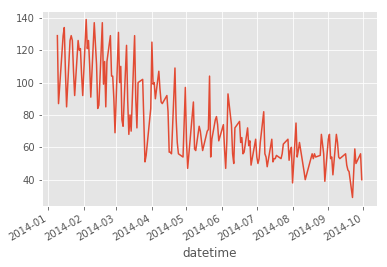

In [0]:
#超単純な折れ線グラフ
df['sales'].plot()

売上個数は右肩下がり

In [0]:
# 少しだけ情報量の多い折れ線グラフ
df.plot(y=['temperature', 'temperature_rolling_mean', 'temperature_pct_change'],  figsize=(16,4), alpha=0.5) # x軸がindexである場合は明記しなくても可
plt.title('気温変化に関する図', fontproperties=font_prop) # fontpropertiesは日本語表示に必要

Text(0.5,1,'\xe6\xb0\x97\xe6\xb8\xa9\xe5\xa4\x89\xe5\x8c\x96\xe3\x81\xab\xe9\x96\xa2\xe3\x81\x99\xe3\x82\x8b\xe5\x9b\xb3')

Error in callback <function post_execute at 0x115cf3ed8> (for post_execute):


IOError: [Errno 2] No such file or directory: '/Users/ysdyt/Downloads/TakaoPGothic.ttf'

IOError: [Errno 2] No such file or directory: '/Users/ysdyt/Downloads/TakaoPGothic.ttf'

<Figure size 1152x288 with 1 Axes>

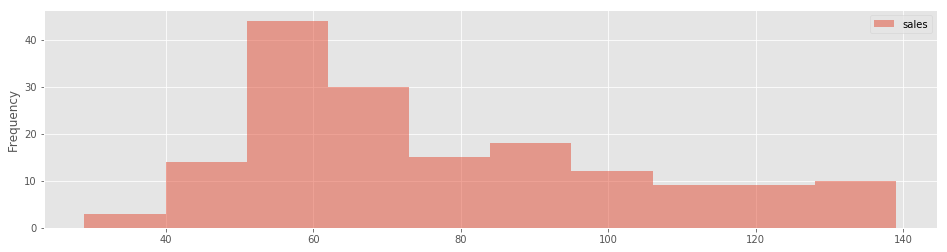

In [0]:
# ヒストグラム
df.plot(kind='hist', y='sales' , bins=10, figsize=(16,4), alpha=0.5)

頻度的には、
- 日別で60個くらい売れている日が多いらしい
- 最大で140個くらい売れている日もあることがわかる　など

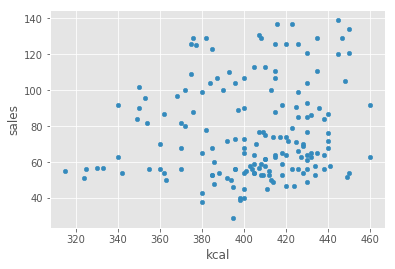

In [0]:
# 散布図
df.plot(kind='scatter', x='kcal', y='sales')

- 「売上個数」と「カロリー」には相関がなさそう　など

In [0]:
# ちなみに相関係数はcorrメソッドで簡単に表示できる
df[['kcal', 'sales']].corr()

,kcal,sales
kcal,1.000000,0.129521
sales,0.129521,1.000000


In [0]:
# ちょっとだけ複雑な集計 例: 月別・期間別の売上個数の状況を可視化したい場合
monthly_df = pd.DataFrame(df.groupby(['month', 'period'])['sales'].sum())
pivot_monthly_df = monthly_df.reset_index().pivot(index='month', columns='period', values='sales')
pivot_monthly_df

period,上旬,中旬,下旬
month,,,
1,216,581,1018
2,725,715,609
3,614,698,369
4,792,344,457
5,316,406,517
6,467,440,311
7,460,277,406
8,288,250,334
9,468,249,234


In [0]:
# 棒グラフ
pivot_monthly_df.plot(kind='bar', alpha=0.6, figsize=(12,3)).legend(prop=font_prop) # legend(prop=font_prop)は日本語表示に必要
plt.title('月別・期間別の売上個数', fontproperties=font_prop) # fontpropertiesは日本語表示に必要

Text(0.5,1,'\xe6\x9c\x88\xe5\x88\xa5\xe3\x83\xbb\xe6\x9c\x9f\xe9\x96\x93\xe5\x88\xa5\xe3\x81\xae\xe5\xa3\xb2\xe4\xb8\x8a\xe5\x80\x8b\xe6\x95\xb0')

Error in callback <function post_execute at 0x115cf3ed8> (for post_execute):


IOError: [Errno 2] No such file or directory: '/Users/ysdyt/Downloads/TakaoPGothic.ttf'

IOError: [Errno 2] No such file or directory: '/Users/ysdyt/Downloads/TakaoPGothic.ttf'

<Figure size 864x216 with 1 Axes>

- 1月は下旬（20日から31日まで）に売上個数が増える傾向
- 4月だと上旬（1日から10日まで）が売上多い
- 月が進むほど、期間に関係なく売上個数が少なくなっていく傾向　など

## ⑧ 変数の前処理

**dummy化について**
![get_dummies](./figs/get_dummies.PNG)

In [0]:
# 現在のcolumnを確認
print(df.columns)
print(len(df.columns))

Index([u'sales', u'week', u'soldout', u'name', u'kcal', u'event', u'payday',
       u'weather', u'precipitation', u'temperature', u'month', u'day',
       u'period', u'temperature_diff', u'temperature_rolling_mean',
       u'temperature_pct_change'],
      dtype='object')
16


In [0]:
# テキストデータが入っている列全てをdummy化する
dummy_df = pd.get_dummies(df, columns=['week', 'name', 'event', 'weather', 'period'])
dummy_df.head()

,sales,soldout,kcal,payday,precipitation,temperature,month,day,temperature_diff,temperature_rolling_mean,...,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,period_上旬,period_中旬,period_下旬
datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-09,129,1,435.0,0.0,0.0,10.9,1,9,1.1,9.333333,...,0,0,1,0,0,0,0,1,0,0
2014-01-10,87,0,440.0,1.0,0.0,5.1,1,10,-5.8,8.600000,...,1,0,0,0,0,0,0,1,0,0
2014-01-14,129,1,376.0,0.0,0.0,5.8,1,14,0.7,7.266667,...,0,1,0,0,0,0,0,0,1,0
2014-01-15,134,0,450.0,0.0,0.0,2.9,1,15,-2.9,4.600000,...,0,0,1,0,0,0,0,0,1,0
2014-01-16,107,0,415.0,0.0,0.0,7.0,1,16,4.1,5.233333,...,1,0,0,0,0,0,0,0,1,0


In [0]:
# jupyter notebookにおいて、pandasで表示が省略されるのを防ぐ
pd.set_option('display.max_columns', 160) # 160番目の列まで全て強制表示

In [0]:
print(dummy_df.shape)
dummy_df.head()

(164, 157)


,sales,soldout,kcal,payday,precipitation,temperature,month,day,temperature_diff,temperature_rolling_mean,temperature_pct_change,week_月,week_木,week_水,week_火,week_金,name_いか天ぷら,name_かじきの甘辛煮,name_きのこソースハンバーグ,name_さわら焼味噌掛け,name_さんま辛味焼,name_たっぷりベーコンフライ,name_ぶりレモンペッパー焼き,name_ますのマスタードソース,name_アジ唐揚げ南蛮ソース,name_エビフライ,name_カレイの唐揚げ,name_カレイ唐揚げ 甘酢あん,name_カレイ唐揚げ夏野菜あん,name_カレイ唐揚げ野菜あんかけ,name_カレイ唐揚げ野菜餡かけ,name_カレイ野菜あんかけ,name_キスと野菜の天ぷら,name_キーマカレー,name_ゴーヤチャンプルー,name_サバ焼味噌掛け,name_サーモンのムニエル2色ソース,name_サーモンフライ・タルタル,name_ジャンボチキンカツ,name_ジューシーメンチカツ,name_タンドリーチキン,name_チキンのコーンクリーム焼き,name_チキンの辛味噌焼き,name_チキンクリームシチュー,name_チキンステーキ・きのこソース,name_チキンフリカッセ,name_チキン南蛮,name_チキン香草焼きマスタードソース,name_チャプチェ,name_チンジャオロース,name_チーズハンバーグ,name_チーズメンチカツ,name_チーズ入りハンバーグ,name_チーズ入りメンチカツ,name_ハンバーグカレーソース,name_ハンバーグケッチャップソース,name_ハンバーグデミソース,name_ハンバーグ和風きのこソース,name_ハンバーグ（デミきのこバター）,name_バーベキューチキン,name_ビーフカレー,name_ビーフシチュー,name_ビーフストロガノフ,name_ビーフトマト煮,name_プルコギ,name_ホタテクリ―ムシチュー,name_ボローニャ風カツ,name_ポークソテー韓国ソース,name_ポークハヤシ,name_ポーク生姜焼き,name_マーボ茄子,name_マーボ豆腐,name_メダイ照り焼,name_メンチカツ,name_ロース甘味噌焼き,name_八宝菜,name_厚切イカフライ,name_厚切ハムカツ,name_名古屋味噌カツ,name_和風ソースハンバーグ,name_和風ハンバーグ,name_回鍋肉,name_手作りひれかつ,name_手作りひれかつとカレー,name_手作りチキンカツ,name_手作りトンカツ,name_手作りロースカツ,name_洋食屋さんのメンチカツ,name_海老クリーミ―クノーデル,name_海老フライとホタテ串カツ,name_海老フライタルタル,name_炊き込みご飯,name_牛すき焼き風,name_牛カルビ焼き肉,name_牛スキヤキ,name_牛丼風煮,name_牛肉すき焼き風,name_牛肉コロッケ,name_牛肉ニンニクの芽炒め,name_牛肉筍煮,name_白身魚のマスタード焼き,name_白身魚の南部焼き,name_白身魚フライ,name_白身魚ムニエル,name_白身魚唐揚げ野菜あんかけ,name_白身魚唐揚げ野菜餡かけ,name_筑前煮,name_肉じゃが,name_肉団子のシチュー,name_肉団子クリームシチュー,name_親子煮,name_豚すき焼き,name_豚の冷しゃぶ,name_豚キムチ炒め,name_豚ロースのピザ風チーズ焼き,name_豚冷シャブ野菜添え,name_豚味噌メンチカツ,name_豚肉と玉子の炒め,name_豚肉と茄子のピリ辛炒め,name_豚肉のマスタード焼き,name_豚肉の生姜焼き,name_豚肉の胡麻シャブ,name_越冬キャベツのメンチカツ,name_酢豚,name_酢豚orカレー,name_青梗菜牛肉炒め,name_青椒肉絲,name_鶏のから揚げねぎ塩炒めソース,name_鶏のから揚げスイートチリソース,name_鶏のカッシュナッツ炒め,name_鶏のトマトシチュー,name_鶏のピリ辛焼き,name_鶏のレモンペッパー焼orカレー,name_鶏の味噌漬け焼き,name_鶏の唐揚げ,name_鶏の唐揚げおろしソース,name_鶏の塩から揚げ,name_鶏の天ぷら,name_鶏の照り焼きマスタード,name_鶏の照り焼きマヨ,name_鶏の親子煮,name_鶏チリソース,name_鶏肉とカシューナッツ炒め,name_鶏肉のカレー唐揚,name_鶏肉の山賊焼き,event_キャリアアップ支援セミナー,event_ママの会,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,period_上旬,period_中旬,period_下旬
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-09,129,1,435.0,0.0,0.0,10.9,1,9,1.1,9.333333,0.112245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2014-01-10,87,0,440.0,1.0,0.0,5.1,1,10,-5.8,8.600000,-0.532110,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2014-01-14,129,1,376.0,0.0,0.0,5.8,1,14,0.7,7.266667,0.137255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2014-01-15,134,0,450.0,0.0,0.0,2.9,1,15,-2.9,4.600000,-0.500000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2014-01-16,107,0,415.0,0.0,0.0,7.0,1,16,4.1,5.233333,1.413793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## ⑨ 最後に、出来たデータをもう一度眺める
欠損値が残っていないかなどを改めて確認し、問題なさそうであれば一旦CSVファイルとして保存しておきます。  
（簡易式ではありますが、）これでひとまずの前処理は完了です！

In [0]:
# 改めて、各列にNaNが入っていないか確認
print(dummy_df.isnull().sum()) 
dummy_df.head()

sales                       0
soldout                     0
kcal                        0
payday                      0
precipitation               0
temperature                 0
month                       0
day                         0
temperature_diff            0
temperature_rolling_mean    0
temperature_pct_change      0
week_月                      0
week_木                      0
week_水                      0
week_火                      0
week_金                      0
name_いか天ぷら                  0
name_かじきの甘辛煮                0
name_きのこソースハンバーグ            0
name_さわら焼味噌掛け               0
name_さんま辛味焼                 0
name_たっぷりベーコンフライ            0
name_ぶりレモンペッパー焼き            0
name_ますのマスタードソース            0
name_アジ唐揚げ南蛮ソース             0
name_エビフライ                  0
name_カレイの唐揚げ                0
name_カレイ唐揚げ 甘酢あん            0
name_カレイ唐揚げ夏野菜あん            0
name_カレイ唐揚げ野菜あんかけ           0
                           ..
name_鶏のから揚げねぎ塩炒めソース         0
name_鶏のから揚げスイートチリソース        0
name_鶏のカッシ

,sales,soldout,kcal,payday,precipitation,temperature,month,day,temperature_diff,temperature_rolling_mean,temperature_pct_change,week_月,week_木,week_水,week_火,week_金,name_いか天ぷら,name_かじきの甘辛煮,name_きのこソースハンバーグ,name_さわら焼味噌掛け,name_さんま辛味焼,name_たっぷりベーコンフライ,name_ぶりレモンペッパー焼き,name_ますのマスタードソース,name_アジ唐揚げ南蛮ソース,name_エビフライ,name_カレイの唐揚げ,name_カレイ唐揚げ 甘酢あん,name_カレイ唐揚げ夏野菜あん,name_カレイ唐揚げ野菜あんかけ,name_カレイ唐揚げ野菜餡かけ,name_カレイ野菜あんかけ,name_キスと野菜の天ぷら,name_キーマカレー,name_ゴーヤチャンプルー,name_サバ焼味噌掛け,name_サーモンのムニエル2色ソース,name_サーモンフライ・タルタル,name_ジャンボチキンカツ,name_ジューシーメンチカツ,name_タンドリーチキン,name_チキンのコーンクリーム焼き,name_チキンの辛味噌焼き,name_チキンクリームシチュー,name_チキンステーキ・きのこソース,name_チキンフリカッセ,name_チキン南蛮,name_チキン香草焼きマスタードソース,name_チャプチェ,name_チンジャオロース,name_チーズハンバーグ,name_チーズメンチカツ,name_チーズ入りハンバーグ,name_チーズ入りメンチカツ,name_ハンバーグカレーソース,name_ハンバーグケッチャップソース,name_ハンバーグデミソース,name_ハンバーグ和風きのこソース,name_ハンバーグ（デミきのこバター）,name_バーベキューチキン,name_ビーフカレー,name_ビーフシチュー,name_ビーフストロガノフ,name_ビーフトマト煮,name_プルコギ,name_ホタテクリ―ムシチュー,name_ボローニャ風カツ,name_ポークソテー韓国ソース,name_ポークハヤシ,name_ポーク生姜焼き,name_マーボ茄子,name_マーボ豆腐,name_メダイ照り焼,name_メンチカツ,name_ロース甘味噌焼き,name_八宝菜,name_厚切イカフライ,name_厚切ハムカツ,name_名古屋味噌カツ,name_和風ソースハンバーグ,name_和風ハンバーグ,name_回鍋肉,name_手作りひれかつ,name_手作りひれかつとカレー,name_手作りチキンカツ,name_手作りトンカツ,name_手作りロースカツ,name_洋食屋さんのメンチカツ,name_海老クリーミ―クノーデル,name_海老フライとホタテ串カツ,name_海老フライタルタル,name_炊き込みご飯,name_牛すき焼き風,name_牛カルビ焼き肉,name_牛スキヤキ,name_牛丼風煮,name_牛肉すき焼き風,name_牛肉コロッケ,name_牛肉ニンニクの芽炒め,name_牛肉筍煮,name_白身魚のマスタード焼き,name_白身魚の南部焼き,name_白身魚フライ,name_白身魚ムニエル,name_白身魚唐揚げ野菜あんかけ,name_白身魚唐揚げ野菜餡かけ,name_筑前煮,name_肉じゃが,name_肉団子のシチュー,name_肉団子クリームシチュー,name_親子煮,name_豚すき焼き,name_豚の冷しゃぶ,name_豚キムチ炒め,name_豚ロースのピザ風チーズ焼き,name_豚冷シャブ野菜添え,name_豚味噌メンチカツ,name_豚肉と玉子の炒め,name_豚肉と茄子のピリ辛炒め,name_豚肉のマスタード焼き,name_豚肉の生姜焼き,name_豚肉の胡麻シャブ,name_越冬キャベツのメンチカツ,name_酢豚,name_酢豚orカレー,name_青梗菜牛肉炒め,name_青椒肉絲,name_鶏のから揚げねぎ塩炒めソース,name_鶏のから揚げスイートチリソース,name_鶏のカッシュナッツ炒め,name_鶏のトマトシチュー,name_鶏のピリ辛焼き,name_鶏のレモンペッパー焼orカレー,name_鶏の味噌漬け焼き,name_鶏の唐揚げ,name_鶏の唐揚げおろしソース,name_鶏の塩から揚げ,name_鶏の天ぷら,name_鶏の照り焼きマスタード,name_鶏の照り焼きマヨ,name_鶏の親子煮,name_鶏チリソース,name_鶏肉とカシューナッツ炒め,name_鶏肉のカレー唐揚,name_鶏肉の山賊焼き,event_キャリアアップ支援セミナー,event_ママの会,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,period_上旬,period_中旬,period_下旬
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-09,129,1,435.0,0.0,0.0,10.9,1,9,1.1,9.333333,0.112245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2014-01-10,87,0,440.0,1.0,0.0,5.1,1,10,-5.8,8.600000,-0.532110,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2014-01-14,129,1,376.0,0.0,0.0,5.8,1,14,0.7,7.266667,0.137255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2014-01-15,134,0,450.0,0.0,0.0,2.9,1,15,-2.9,4.600000,-0.500000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2014-01-16,107,0,415.0,0.0,0.0,7.0,1,16,4.1,5.233333,1.413793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [0]:
# 出来たデータをutf-8で保存する
dummy_df.to_csv('./data/processed_datamart.csv', encoding='utf-8')

## きれいになったデータはこの後どう活用するのか？

例えば、'sales'を「目的変数」、それ以外の列を「説明変数」として、目的変数を予測する"モデル"を作成する などがよく行われる。


![modeling](./figs/modeling.PNG)


より目的変数に"効く"説明変数を作ることを**特徴量エンジニアリング**という  
pandasを使った前処理とは、NaNや無関係な説明変数を削除しつつ、"効く"特徴量を探す（作成する）作業のこと

地味だが、モデルの精度を上げるうえでは非常に大切な作業！！！データ分析のほとんどの時間はここに使われる。

## ここでは取り上げられなかったけど、よく分析で使うその他のPandas関数

- df.where()　←df.mask()と反対の条件を対象にする。内容的には同じ処理。
- df.merge()
- df.concat()
- df.melt() ← df.pivot()の逆操作をするもの

などなど、他にも便利でマニアックなメソッドがたくさんあります。

## 参考リンク（もうちょっといろいろ知りたい人用）
**基本操作系**
- [Pandas Cheet Sheet - GitHub](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
    - 基本操作について1ページでまとめてくれているCheet Sheet
    
- [StatsFragments by @sinhrks](http://sinhrks.hatenablog.com/)
    - 各種Pandasメソッドを図付きで詳細に解説してくれています。非常に参考になる。
    
**集計テクニック系**
- [pandasで条件分岐(case when的な)によるデータ加工を網羅したい](https://qiita.com/Hyperion13fleet/items/98c31744e66ac1fc1e9f)
    - SQLのcase whenのような条件分岐の処理をpandasでやりたいときが良くありますがなかなか難しい。そんなときのお助け記事。
    
**作図系**
- [PythonでPandasのPlot機能を使えばデータ加工からグラフ作成までマジでシームレス - Qiita](https://qiita.com/hik0107/items/de5785f680096df93efa)
    - Pandas Plotでできることの概要がわかります
- [pythonで美しいグラフ描画 -seabornを使えばデータ分析と可視化が捗る その1 - Qiita](https://qiita.com/hik0107/items/3dc541158fceb3156ee0)
    - Pandas Plot, matplotlibと比較して簡単に美しいプロットがかけるmatplotのラッパーseabornの概要がわかります 